In [93]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)
#tf.enable_eager_execution()

import tensorflow_hub as hub
import os
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
print("Version: ", tf.__version__)
print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

Version:  2.2.0
Version:  2.2.0
Eager mode:  True
Hub version:  0.8.0
GPU is NOT AVAILABLE


In [94]:
zip_file = tf.keras.utils.get_file(origin='https://storage.googleapis.com/kaggle-data-sets/626818%2F1116946%2Fbundle%2Farchive.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1591272408&Signature=fsU8IrJs4InNhUwQyHfQDay2qGtX26t%2Fpb1P%2B8OCIPBDrr5tJF7S%2BYm%2BxtdtmKi63uMs7GWNpZkM6u2UDWGF7KpyfZ0T95wo%2BFM8qAhdPrivgpjROT%2BER8JC1%2F8uPVuK3GPSYpc8s59JyyNu4UrdiM2zNU8zpq4%2Fxhs51ZAL6cS%2FLlYYvvF01zRyXv%2Fx8b0Dy6R051xZIluzJ%2BnQE1sCTYZi1oEzVsuM%2BnQyjIv5%2BHt8GrUiz%2FacZKtguE%2FKogMa4xgR0TLXEQo%2B%2B4emiUwIfLJwrMn3mNZFA50DLM%2F8dkgtCH62wLO%2BlAdZgjG4GQOHX8bzqg5839mmbxyJBuCBHQ%3D%3D',
                                           fname='color.zip', extract=True,archive_format='auto', cache_dir=None)
print(zip_file)

/root/.keras/datasets/color.zip


In [95]:
data_dir = os.path.join(os.path.dirname(zip_file), 'color')
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'validation')
print('done')
print(data_dir)
print(train_dir)
print(validation_dir)

done
/root/.keras/datasets/color
/root/.keras/datasets/color/train
/root/.keras/datasets/color/validation


In [0]:
import time
import os
from os.path import exists

def count(dir, counter=0):
    "returns number of files in dir and subdirs"
    for pack in os.walk(dir):
        for f in pack[2]:
            counter += 1
    return dir + " : " + str(counter) + "files"

In [97]:
print('total images for training :', count(train_dir))
print('total images for validation :', count(validation_dir))

total images for training : /root/.keras/datasets/color/train : 150files
total images for validation : /root/.keras/datasets/color/validation : 75files


In [98]:
TRAINING_DIR = train_dir
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = validation_dir
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=10
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=5
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=5, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("color.h5")

Found 150 images belonging to 3 classes.
Found 75 images belonging to 3 classes.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_______________________________________

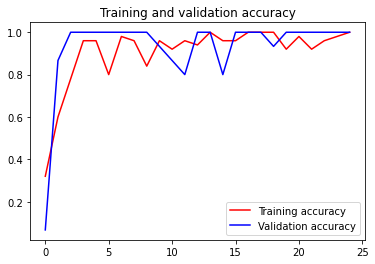

<Figure size 432x288 with 0 Axes>

In [100]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [102]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)
  red = np.array([[0, 0, 1]])
  comparison = classes == red

  equal_arrays = comparison.all()


  
  blue = np.array([[1, 0, 0]])
  comparison1 = classes == blue

  equal_arrays1 = comparison1.all()


  
  green = np.array([[0, 1, 0]])
  comparison2 = classes == green

  equal_arrays2 = comparison2.all()


  
  if equal_arrays == True:
    print('RED')
  elif equal_arrays1 == True:
    print('BLUE')
  elif equal_arrays2 == True:
    print('GREEN')
  
  
  

Saving 1.jpg to 1.jpg
1.jpg
[[1. 0. 0.]]
BLUE
